In [157]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [158]:
def read_csv(file):
    return pd.read_csv(file, names=['RESOLUTION', 'CHM', 'CHD', 'IFN', 'IRN', 'OPN', 'SMQ', 'SCOH', 'SCOP', 'CMQ', 'CCOH', 'CCOP', 'SERVICES'])
df = read_csv('jpetstore_09_09_11_53_07_K4.csv')

df

RESOLUTION       CHM       CHD       IFN   IRN   OPN       SMQ      SCOH  \
0          0.3  0.532210  0.330154  1.333333  89.0  67.0  0.250309  0.416667   
1          0.3  0.532210  0.330154  1.333333  89.0  67.0  0.250309  0.416667   
2          0.3  0.532210  0.330154  1.333333  89.0  67.0  0.250309  0.416667   
3          0.4  0.532210  0.330154  1.333333  78.0  67.0  0.160251  0.388095   
4          0.4  0.532210  0.330154  1.333333  78.0  67.0  0.160251  0.388095   
5          0.4  0.532210  0.330154  1.333333  78.0  67.0  0.160251  0.388095   
6          0.5  0.532210  0.330154  1.333333  68.0  67.0  0.163796  0.336111   
7          0.5  0.532210  0.330154  1.333333  68.0  67.0  0.163796  0.336111   
8          0.5  0.532210  0.330154  1.333333  68.0  67.0  0.163796  0.336111   
9          0.6  0.532210  0.330154  1.333333  68.0  67.0  0.163796  0.336111   
10         0.6  0.532210  0.330154  1.333333  68.0  67.0  0.163796  0.336111   
11         0.6  0.532210  0.330154  1.333333  68.0  67.0  0.163796  0.336111   
12         0.7  0.532210  0.330154  1.333333  68.0  67.0  0.163796  0.336111   
13         0.7  0.532210  0.330154  1.333333  68.0  67.0  0.163796  0.336111   
14         0.7  0.532210  0.330154  1.333333  68.0  67.0  0.163796  0.336111   
15         0.8  0.558347  0.327079  1.000000  48.0  68.0  0.189375  0.296667   
16         0.8  0.558347  0.327079  1.000000  48.0  68.0  0.189375  0.296667   
17         0.8  0.532210  0.330154  1.333333  52.0  67.0  0.191806  0.310000   
18         0.9  0.532210  0.330154  1.333333  52.0  67.0  0.191806  0.310000   
19         0.9  0.532210  0.330154  1.333333  45.0  67.0  0.146230  0.259524   
20         0.9  0.532210  0.330154  1.333333  52.0  67.0  0.191806  0.310000   
21         1.0  0.532210  0.330154  1.333333  45.0  67.0  0.146230  0.259524   
22         1.0  0.532210  0.330154  1.333333  45.0  67.0  0.146230  0.259524   
23         1.0  0.558347  0.327079  1.000000  48.0  68.0  0.189375  0.296667   

        SCOP       CMQ      CCOH      CCOP  SERVICES  
0   0.166358  0.557778  0.566667  0.008889        10  
1   0.166358  0.557778  0.566667  0.008889        10  
2   0.166358  0.557778  0.566667  0.008889        10  
3   0.227844  0.353515  0.376190  0.022676         7  
4   0.227844  0.353515  0.376190  0.022676         7  
5   0.227844  0.353515  0.376190  0.022676         7  
6   0.172315  0.424444  0.455556  0.031111         6  
7   0.172315  0.424444  0.455556  0.031111         6  
8   0.172315  0.424444  0.455556  0.031111         6  
9   0.172315  0.424444  0.455556  0.031111         6  
10  0.172315  0.424444  0.455556  0.031111         6  
11  0.172315  0.424444  0.455556  0.031111         6  
12  0.172315  0.424444  0.455556  0.031111         6  
13  0.172315  0.424444  0.455556  0.031111         6  
14  0.172315  0.424444  0.455556  0.031111         6  
15  0.107292  0.393333  0.453333  0.060000         5  
16  0.107292  0.393333  0.453333  0.060000         5  
17  0.118194  0.420000  0.480000  0.060000         5  
18  0.118194  0.420000  0.480000  0.060000         5  
19  0.113294  0.260714  0.344048  0.083333         4  
20  0.118194  0.420000  0.480000  0.060000         5  
21  0.113294  0.260714  0.344048  0.083333         4  
22  0.113294  0.260714  0.344048  0.083333         4  
23  0.107292  0.393333  0.453333  0.060000         5

In [159]:
# Normalize data
df_norm = df.copy()

def normalize(df):
    df_min = df.min()
    df_max = df.max()
    if df_min != df_max: 
        df = df.apply(lambda x : (x - df_min) /(df_max - df_min))
    else:
        df = df.apply(lambda x : 1)
        #print(f"[WARNING] Equal values on normalization")
    return df

def normalize_data(df):
    df['IFN'] = normalize(df['IFN'])
    df['IRN'] = normalize(df['IRN'])
    df['SMQ'] = normalize(df['SMQ'])
    df['CMQ'] = normalize(df['CMQ'])

    return df

    
df_norm = normalize_data(df_norm)


In [160]:
# Adjust values of IFN, IRN, SCOP and CCOP to 1-x, (lower values mean better results) 
def adjust_values(df):
    df['IFN'] = df['IFN'].apply(lambda x: 1-x)
    df['IRN'] = df['IRN'].apply(lambda x: 1-x)
    df['SCOP'] = df['SCOP'].apply(lambda x: 1-x)
    df['CCOP'] = df['CCOP'].apply(lambda x: 1-x)
    return df
df_norm = adjust_values(df_norm)
df_norm

RESOLUTION       CHM       CHD  IFN       IRN   OPN       SMQ      SCOH  \
0          0.3  0.532210  0.330154  0.0  0.000000  67.0  1.000000  0.416667   
1          0.3  0.532210  0.330154  0.0  0.000000  67.0  1.000000  0.416667   
2          0.3  0.532210  0.330154  0.0  0.000000  67.0  1.000000  0.416667   
3          0.4  0.532210  0.330154  0.0  0.250000  67.0  0.134717  0.388095   
4          0.4  0.532210  0.330154  0.0  0.250000  67.0  0.134717  0.388095   
5          0.4  0.532210  0.330154  0.0  0.250000  67.0  0.134717  0.388095   
6          0.5  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
7          0.5  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
8          0.5  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
9          0.6  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
10         0.6  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
11         0.6  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
12         0.7  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
13         0.7  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
14         0.7  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
15         0.8  0.558347  0.327079  1.0  0.931818  68.0  0.414541  0.296667   
16         0.8  0.558347  0.327079  1.0  0.931818  68.0  0.414541  0.296667   
17         0.8  0.532210  0.330154  0.0  0.840909  67.0  0.437895  0.310000   
18         0.9  0.532210  0.330154  0.0  0.840909  67.0  0.437895  0.310000   
19         0.9  0.532210  0.330154  0.0  1.000000  67.0  0.000000  0.259524   
20         0.9  0.532210  0.330154  0.0  0.840909  67.0  0.437895  0.310000   
21         1.0  0.532210  0.330154  0.0  1.000000  67.0  0.000000  0.259524   
22         1.0  0.532210  0.330154  0.0  1.000000  67.0  0.000000  0.259524   
23         1.0  0.558347  0.327079  1.0  0.931818  68.0  0.414541  0.296667   

        SCOP       CMQ      CCOH      CCOP  SERVICES  
0   0.833642  1.000000  0.566667  0.991111        10  
1   0.833642  1.000000  0.566667  0.991111        10  
2   0.833642  1.000000  0.566667  0.991111        10  
3   0.772156  0.312393  0.376190  0.977324         7  
4   0.772156  0.312393  0.376190  0.977324         7  
5   0.772156  0.312393  0.376190  0.977324         7  
6   0.827685  0.551162  0.455556  0.968889         6  
7   0.827685  0.551162  0.455556  0.968889         6  
8   0.827685  0.551162  0.455556  0.968889         6  
9   0.827685  0.551162  0.455556  0.968889         6  
10  0.827685  0.551162  0.455556  0.968889         6  
11  0.827685  0.551162  0.455556  0.968889         6  
12  0.827685  0.551162  0.455556  0.968889         6  
13  0.827685  0.551162  0.455556  0.968889         6  
14  0.827685  0.551162  0.455556  0.968889         6  
15  0.892708  0.446433  0.453333  0.940000         5  
16  0.892708  0.446433  0.453333  0.940000         5  
17  0.881806  0.536201  0.480000  0.940000         5  
18  0.881806  0.536201  0.480000  0.940000         5  
19  0.886706  0.000000  0.344048  0.916667         4  
20  0.881806  0.536201  0.480000  0.940000         5  
21  0.886706  0.000000  0.344048  0.916667         4  
22  0.886706  0.000000  0.344048  0.916667         4  
23  0.892708  0.446433  0.453333  0.940000         5

In [161]:
def calculate_total(df):
    df['TOTAL'] = (df.loc[:,'IFN':'IRN'].sum(axis=1) + df.loc[:,'SMQ'] + df.loc[:,'CMQ'])
    df['Total'] = (0.1 * df.loc[:,'CHM']) + (0.1 * df.loc[:,'CHD']) + (0.2 * df.loc[:,'IFN']) + (0.2 * df.loc[:,'IRN']) + (0.2 * df.loc[:,'SMQ']) + (0.2 * df.loc[:,'CMQ'])
    df['Total'] = df.loc[:,'SCOH'] + df.loc[:,'SCOP'] + df.loc[:,'CCOH'] + df.loc[:,'CCOP']
    return df

df_norm = calculate_total(df_norm)
df_norm


RESOLUTION       CHM       CHD  IFN       IRN   OPN       SMQ      SCOH  \
0          0.3  0.532210  0.330154  0.0  0.000000  67.0  1.000000  0.416667   
1          0.3  0.532210  0.330154  0.0  0.000000  67.0  1.000000  0.416667   
2          0.3  0.532210  0.330154  0.0  0.000000  67.0  1.000000  0.416667   
3          0.4  0.532210  0.330154  0.0  0.250000  67.0  0.134717  0.388095   
4          0.4  0.532210  0.330154  0.0  0.250000  67.0  0.134717  0.388095   
5          0.4  0.532210  0.330154  0.0  0.250000  67.0  0.134717  0.388095   
6          0.5  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
7          0.5  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
8          0.5  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
9          0.6  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
10         0.6  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
11         0.6  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
12         0.7  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
13         0.7  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
14         0.7  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
15         0.8  0.558347  0.327079  1.0  0.931818  68.0  0.414541  0.296667   
16         0.8  0.558347  0.327079  1.0  0.931818  68.0  0.414541  0.296667   
17         0.8  0.532210  0.330154  0.0  0.840909  67.0  0.437895  0.310000   
18         0.9  0.532210  0.330154  0.0  0.840909  67.0  0.437895  0.310000   
19         0.9  0.532210  0.330154  0.0  1.000000  67.0  0.000000  0.259524   
20         0.9  0.532210  0.330154  0.0  0.840909  67.0  0.437895  0.310000   
21         1.0  0.532210  0.330154  0.0  1.000000  67.0  0.000000  0.259524   
22         1.0  0.532210  0.330154  0.0  1.000000  67.0  0.000000  0.259524   
23         1.0  0.558347  0.327079  1.0  0.931818  68.0  0.414541  0.296667   

        SCOP       CMQ      CCOH      CCOP  SERVICES     TOTAL     Total  
0   0.833642  1.000000  0.566667  0.991111        10  2.000000  2.808086  
1   0.833642  1.000000  0.566667  0.991111        10  2.000000  2.808086  
2   0.833642  1.000000  0.566667  0.991111        10  2.000000  2.808086  
3   0.772156  0.312393  0.376190  0.977324         7  0.697110  2.513766  
4   0.772156  0.312393  0.376190  0.977324         7  0.697110  2.513766  
5   0.772156  0.312393  0.376190  0.977324         7  0.697110  2.513766  
6   0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
7   0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
8   0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
9   0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
10  0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
11  0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
12  0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
13  0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
14  0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
15  0.892708  0.446433  0.453333  0.940000         5  2.792793  2.582708  
16  0.892708  0.446433  0.453333  0.940000         5  2.792793  2.582708  
17  0.881806  0.536201  0.480000  0.940000         5  1.815005  2.611806  
18  0.881806  0.536201  0.480000  0.940000         5  1.815005  2.611806  
19  0.886706  0.000000  0.344048  0.916667         4  1.000000  2.406944  
20  0.881806  0.536201  0.480000  0.940000         5  1.815005  2.611806  
21  0.886706  0.000000  0.344048  0.916667         4  1.000000  2.406944  
22  0.886706  0.000000  0.344048  0.916667         4  1.000000  2.406944  
23  0.892708  0.446433  0.453333  0.940000         5  2.792793  2.582708

In [162]:
def choose_best_iteration_for_resolution(df_norm):
    best = {}
    drop_indexes = []
    for index, row in df_norm.iterrows():
        res = row['RESOLUTION']
        total = row['TOTAL']

        if res in best:
            if total >= best[res][1]:
                drop_indexes.append(best[res][0])
                best[res] = (index, total)
            else:
                drop_indexes.append(index)
        else:
            best[res] = (index, total)


    df_norm = df_norm.drop(df_norm.index[drop_indexes]).reset_index(drop=True)
    return df_norm

df_norm = choose_best_iteration_for_resolution(df_norm)
df_norm
            
        
        

RESOLUTION       CHM       CHD  IFN       IRN   OPN       SMQ      SCOH  \
0         0.3  0.532210  0.330154  0.0  0.000000  67.0  1.000000  0.416667   
1         0.4  0.532210  0.330154  0.0  0.250000  67.0  0.134717  0.388095   
2         0.5  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
3         0.6  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
4         0.7  0.532210  0.330154  0.0  0.477273  67.0  0.168778  0.336111   
5         0.8  0.558347  0.327079  1.0  0.931818  68.0  0.414541  0.296667   
6         0.9  0.532210  0.330154  0.0  0.840909  67.0  0.437895  0.310000   
7         1.0  0.558347  0.327079  1.0  0.931818  68.0  0.414541  0.296667   

       SCOP       CMQ      CCOH      CCOP  SERVICES     TOTAL     Total  
0  0.833642  1.000000  0.566667  0.991111        10  2.000000  2.808086  
1  0.772156  0.312393  0.376190  0.977324         7  0.697110  2.513766  
2  0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
3  0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
4  0.827685  0.551162  0.455556  0.968889         6  1.197213  2.588241  
5  0.892708  0.446433  0.453333  0.940000         5  2.792793  2.582708  
6  0.881806  0.536201  0.480000  0.940000         5  1.815005  2.611806  
7  0.892708  0.446433  0.453333  0.940000         5  2.792793  2.582708

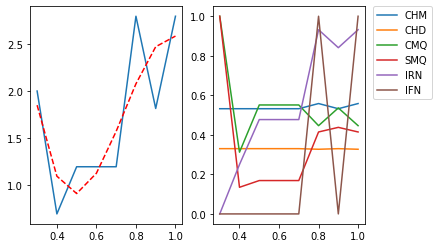

In [163]:
def plot(df_norm):
    x = df_norm['RESOLUTION']
    y = df_norm['TOTAL']
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    
    ax1.plot(x,y)
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    ax1.plot(x,p(x),'r--')
    
    
    ax2.plot(x, df_norm['CHM'], label='CHM')
    ax2.plot(x, df_norm['CHD'], label='CHD')
    ax2.plot(x, df_norm['CMQ'], label='CMQ')
    ax2.plot(x, df_norm['SMQ'], label='SMQ')
    ax2.plot(x, df_norm['IRN'], label='IRN')
    ax2.plot(x, df_norm['IFN'], label='IFN')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    #plt.savefig('jpetstore.png', bbox_inches='tight')
    plt.show()
    


plot(df_norm)




Metrics for kai8406__cmop
Total classes: 237
Total controllers: 34
Open issues : 1
Stars : 17


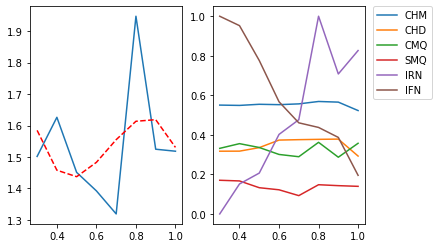

Max val resolution: 0.8



Metrics for chenzhq__WsMonitor
Total classes: 246
Total controllers: 16
Open issues : 8
Stars : 4


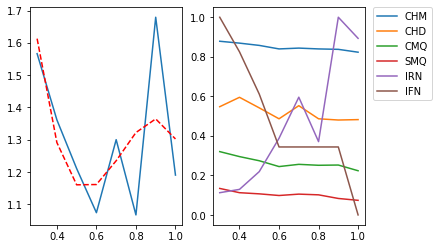

Max val resolution: 0.9



Metrics for sfx478076717__goldenarches
Total classes: 56
Total controllers: 11
Open issues : 0
Stars : 4


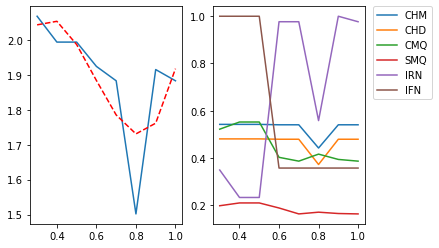

Max val resolution: 0.3



Metrics for forwardNow__javaee_pkui
Total classes: 253
Total controllers: 35
Open issues : 0
Stars : 3


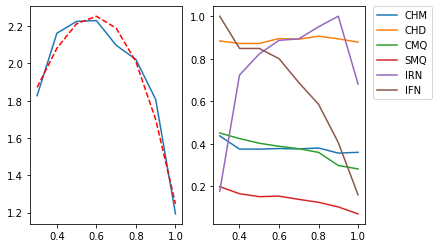

Max val resolution: 0.6



Metrics for YouAreOnlyOne__CommunityInformationForWeb
Total classes: 163
Total controllers: 23
Open issues : 0
Stars : 2


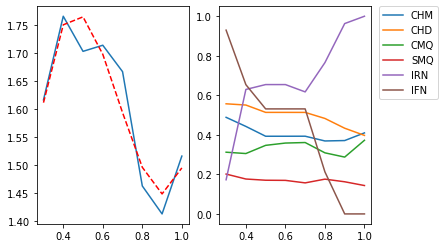

Max val resolution: 0.4



Metrics for SafeExamBrowser__seb-server
Total classes: 680
Total controllers: 46
Open issues : 0
Stars : 5


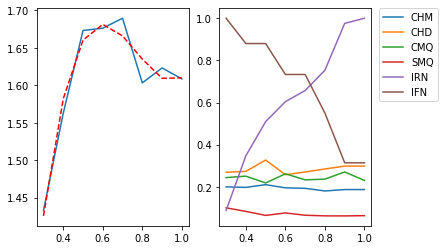

Max val resolution: 0.7



Metrics for leluque__university-site-cms
Total classes: 254
Total controllers: 23
Open issues : 9
Stars : 21


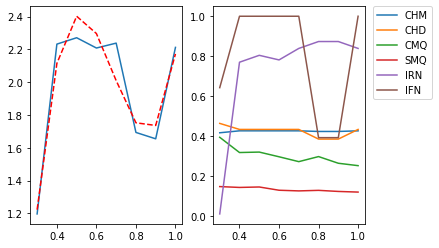

Max val resolution: 0.5



Metrics for ZFGCCP__ZFGC3
Total classes: 471
Total controllers: 26
Open issues : 34
Stars : 4


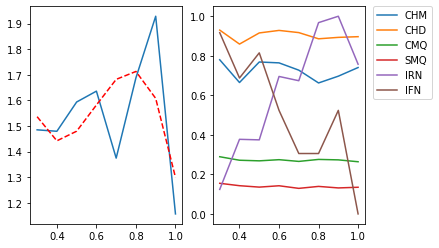

Max val resolution: 0.9



Metrics for OpenGeoportal__OGP2
Total classes: 330
Total controllers: 24
Open issues : 11
Stars : 18


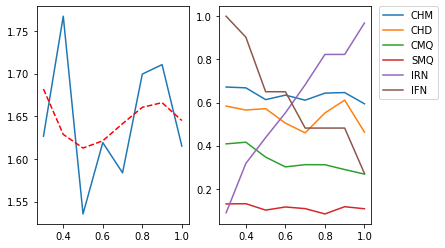

Max val resolution: 0.4



Metrics for AtlasOfLivingAustralia__biocache-service
Total classes: 151
Total controllers: 23
Open issues : 147
Stars : 3


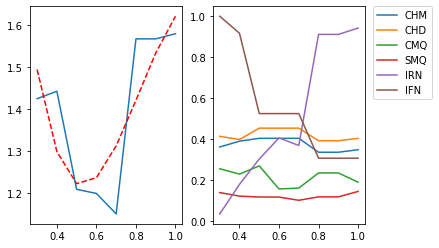

Max val resolution: 1.0



Metrics for choerodon__agile-service-old
Total classes: 914
Total controllers: 98
Open issues : 1
Stars : 17


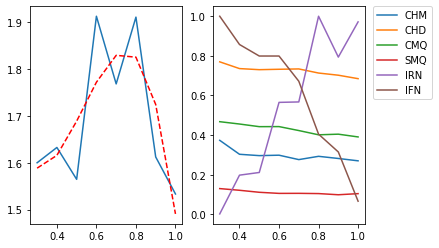

Max val resolution: 0.6



Metrics for iminto__baicai
Total classes: 84
Total controllers: 12
Open issues : 0
Stars : 41


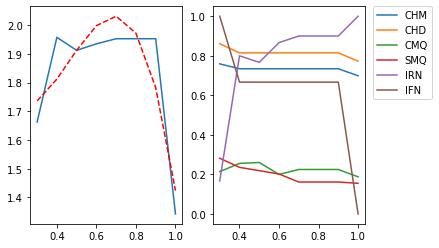

Max val resolution: 0.4



Metrics for busing__circle_web
Total classes: 268
Total controllers: 19
Open issues : 0
Stars : 8


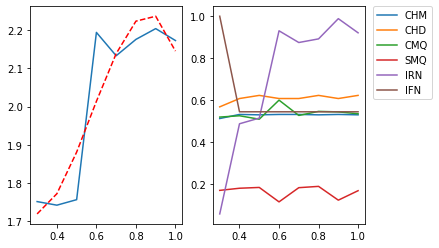

Max val resolution: 0.9



Metrics for GdeiAssistant__GdeiAssistant
Total classes: 455
Total controllers: 84
Open issues : 0
Stars : 79


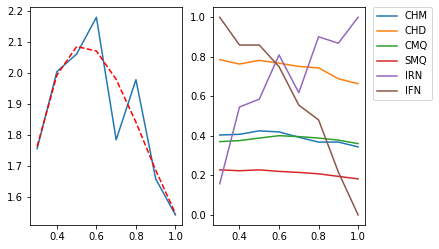

Max val resolution: 0.6



Metrics for LiJiuRi__jie_you_ba
Total classes: 102
Total controllers: 18
Open issues : 0
Stars : 3


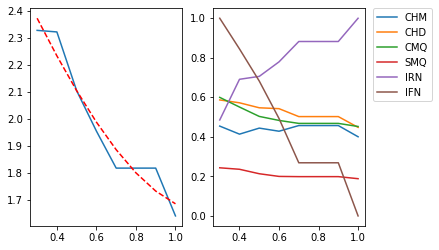

Max val resolution: 0.3



Metrics for starqiu__RDMP1
Total classes: 60
Total controllers: 30
Open issues : 0
Stars : 10


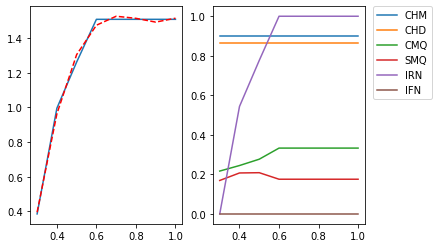

Max val resolution: 0.6



Metrics for ssolutiondev__ssolution
Total classes: 164
Total controllers: 19
Open issues : 0
Stars : 2


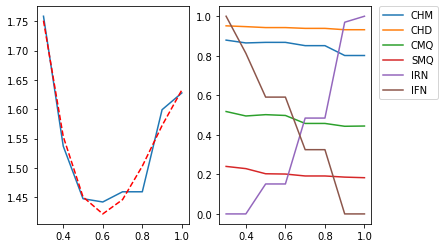

Max val resolution: 0.3



Metrics for Ganweizhi__Ruanzhuo2
Total classes: 142
Total controllers: 23
Open issues : 1
Stars : 2


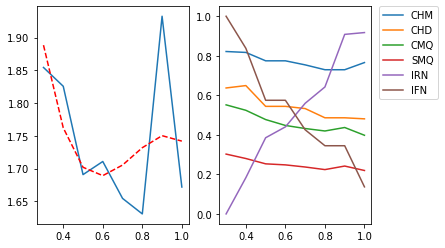

Max val resolution: 0.9



Metrics for skyisbule__nanfeng
Total classes: 71
Total controllers: 13
Open issues : 2
Stars : 4


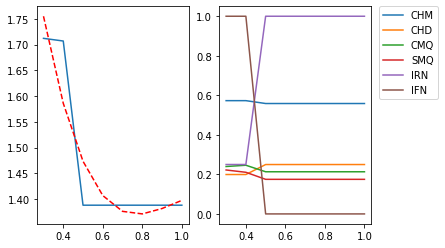

Max val resolution: 0.3



Metrics for mingslife__LightCMS
Total classes: 103
Total controllers: 17
Open issues : 0
Stars : 4


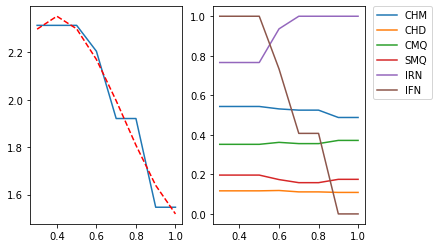

Max val resolution: 0.3



Metrics for parasoft__parabank
Total classes: 260
Total controllers: 71
Open issues : 1
Stars : 10


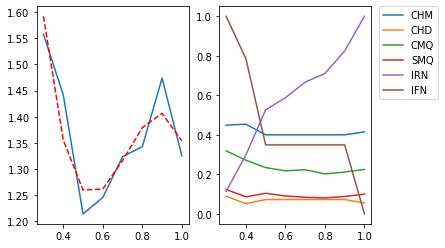

Max val resolution: 0.3



Metrics for assertmyself__gweb-v2
Total classes: 365
Total controllers: 33
Open issues : 0
Stars : 2


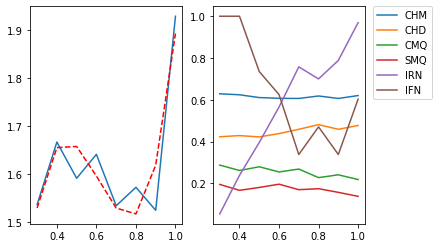

Max val resolution: 1.0



Metrics for litblank__hammer
Total classes: 226
Total controllers: 24
Open issues : 0
Stars : 18


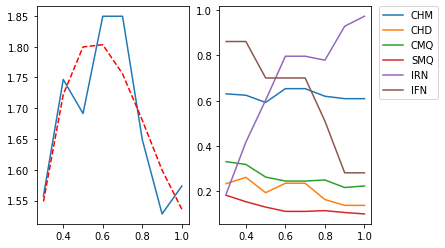

Max val resolution: 0.6



Metrics for 75193982__HyLMS
Total classes: 535
Total controllers: 141
Open issues : 0
Stars : 4


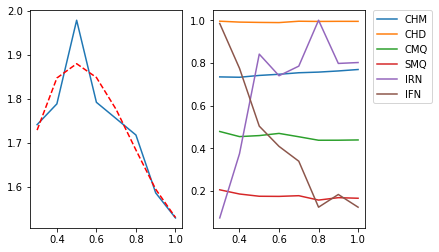

Max val resolution: 0.5



Metrics for bbaibb1009__wxcrm
Total classes: 95
Total controllers: 15
Open issues : 1
Stars : 7


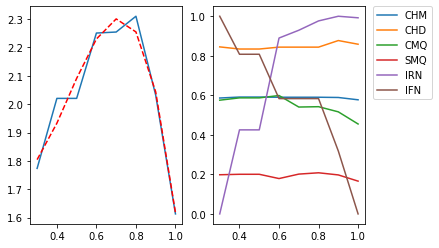

Max val resolution: 0.8



Metrics for shenshaoming__byte_easy
Total classes: 55
Total controllers: 12
Open issues : 0
Stars : 5


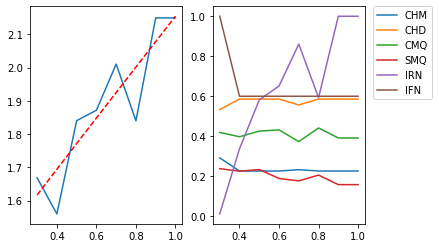

Max val resolution: 0.9



Metrics for liudexiang3218__CMSLite
Total classes: 221
Total controllers: 13
Open issues : 2
Stars : 2


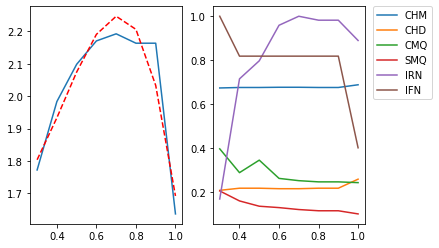

Max val resolution: 0.7



Metrics for dtdhehe__ptu-life
Total classes: 66
Total controllers: 12
Open issues : 0
Stars : 2


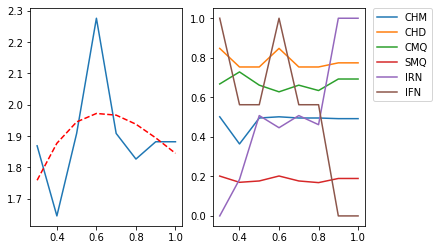

Max val resolution: 0.6



Metrics for Lotharing__SDIMS
Total classes: 112
Total controllers: 20
Open issues : 6
Stars : 34


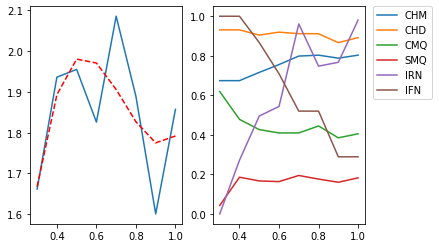

Max val resolution: 0.7



Metrics for Frodez__BlogManagePlatform
Total classes: 317
Total controllers: 15
Open issues : 0
Stars : 33


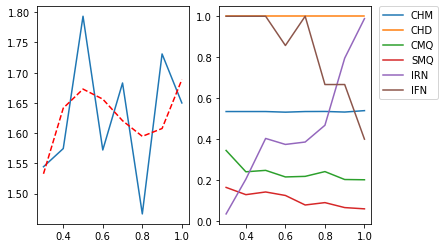

Max val resolution: 0.5



Metrics for cym1102__nginxWebUI
Total classes: 82
Total controllers: 18
Open issues : 0
Stars : 39


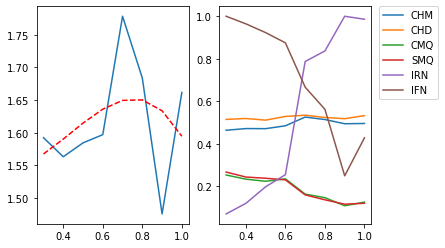

Max val resolution: 0.7



Metrics for forTribeforXuanmo__sword-forum
Total classes: 79
Total controllers: 12
Open issues : 4
Stars : 57


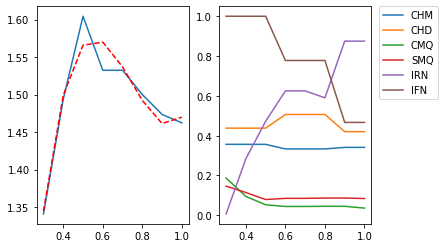

Max val resolution: 0.5



Metrics for linolee__class4
Total classes: 187
Total controllers: 24
Open issues : 4
Stars : 4


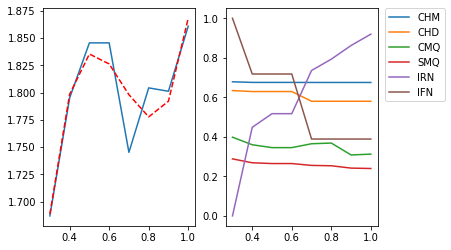

Max val resolution: 1.0



Metrics for kanban__kanban-app
Total classes: 140
Total controllers: 12
Open issues : 5
Stars : 34


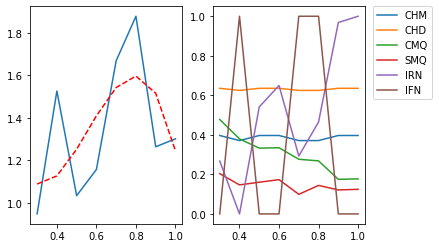

Max val resolution: 0.8



Metrics for kingslayer15__mutual
Total classes: 170
Total controllers: 23
Open issues : 3
Stars : 3


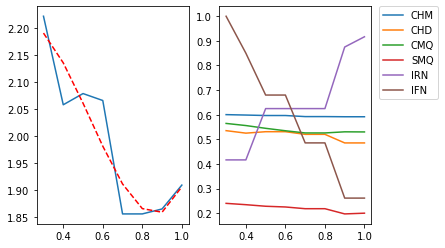

Max val resolution: 0.3



Metrics for thinksgroup__Niceschool
Total classes: 165
Total controllers: 26
Open issues : 1
Stars : 3


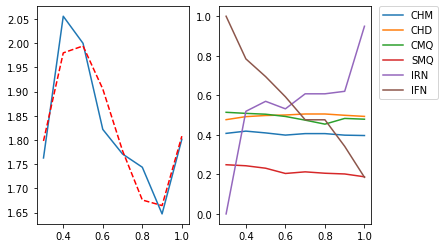

Max val resolution: 0.4



Metrics for racem-cherni__KinderGartenProject
Total classes: 209
Total controllers: 57
Open issues : 0
Stars : 3


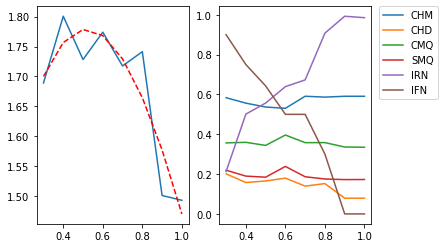

Max val resolution: 0.4



Metrics for jeezhau__ec-server
Total classes: 149
Total controllers: 20
Open issues : 0
Stars : 2


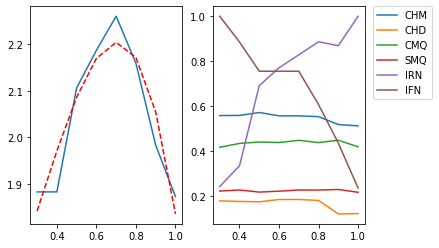

Max val resolution: 0.7



Metrics for xabaohui__zis
Total classes: 553
Total controllers: 135
Open issues : 24
Stars : 2


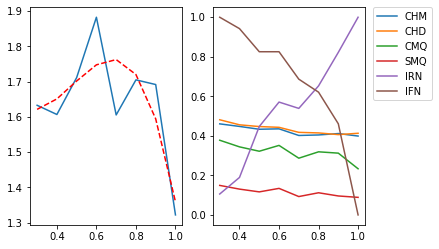

Max val resolution: 0.6



Metrics for CeaMYHBK__AppCeaM
Total classes: 35
Total controllers: 12
Open issues : 0
Stars : 2


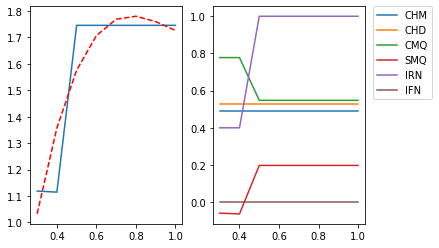

Max val resolution: 0.5



Metrics for nds1993__OpenMPS
Total classes: 922
Total controllers: 141
Open issues : 0
Stars : 3


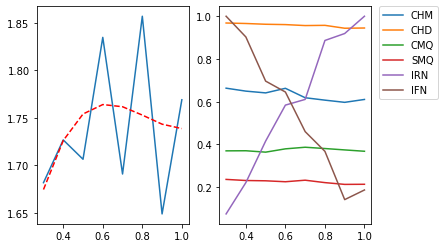

Max val resolution: 0.8



Metrics for Glamdring__welshare
Total classes: 241
Total controllers: 33
Open issues : 0
Stars : 4


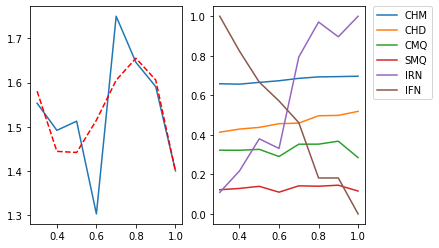

Max val resolution: 0.7



Metrics for Propro-Studio__propro-server
Total classes: 310
Total controllers: 21
Open issues : 2
Stars : 10


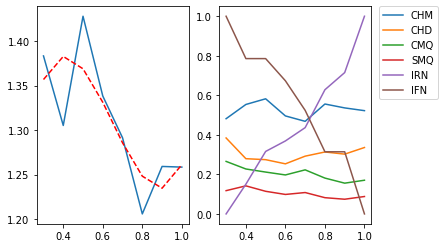

Max val resolution: 0.5



Metrics for BCSquad__pmph
Total classes: 953
Total controllers: 87
Open issues : 14
Stars : 10


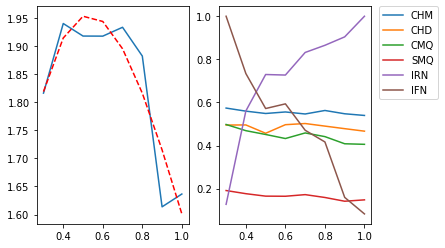

Max val resolution: 0.4



Metrics for WilsonHu__sinsim
Total classes: 243
Total controllers: 42
Open issues : 2
Stars : 4


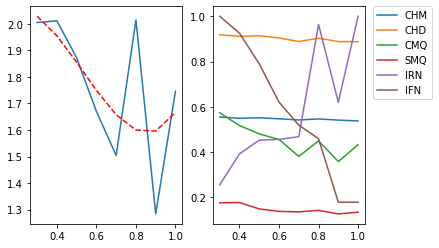

Max val resolution: 0.8



Metrics for dovier__coj-web
Total classes: 453
Total controllers: 62
Open issues : 2
Stars : 4


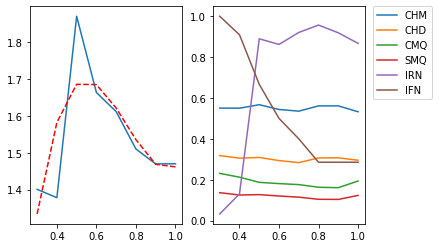

Max val resolution: 0.5



Metrics for cdcchain__cdc-browser
Total classes: 58
Total controllers: 15
Open issues : 0
Stars : 3


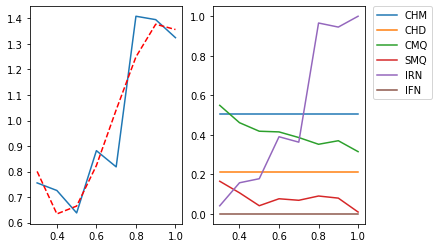

Max val resolution: 0.8



Metrics for VN-Lf__GitNo3
Total classes: 126
Total controllers: 25
Open issues : 0
Stars : 2


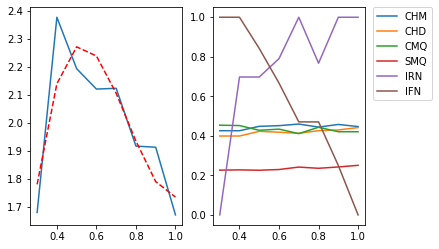

Max val resolution: 0.4



Metrics for xiongzhenhai-zh__produce-project-managerment
Total classes: 113
Total controllers: 14
Open issues : 0
Stars : 3


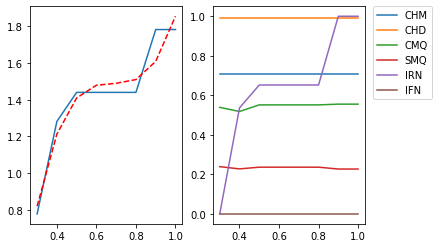

Max val resolution: 0.9



Metrics for loongw513029__buscloud
Total classes: 347
Total controllers: 40
Open issues : 0
Stars : 4


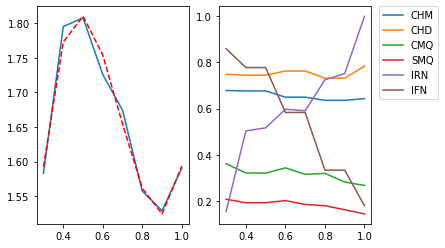

Max val resolution: 0.5



Metrics for XMFBee__AuthPlatform1
Total classes: 281
Total controllers: 63
Open issues : 0
Stars : 3


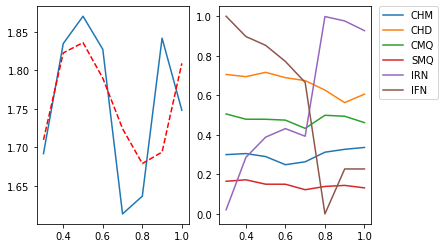

Max val resolution: 0.5



Metrics for shigenwang__membership
Total classes: 153
Total controllers: 18
Open issues : 0
Stars : 5


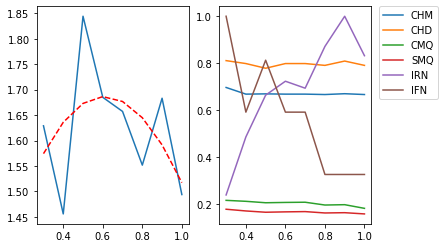

Max val resolution: 0.5



Metrics for miansen__Roothub
Total classes: 389
Total controllers: 33
Open issues : 16
Stars : 100


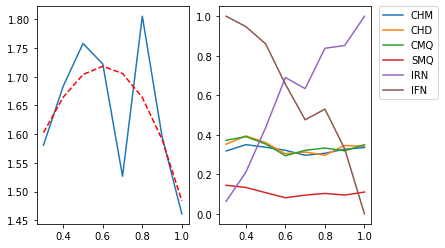

Max val resolution: 0.8



Metrics for zhangyanbo2007__youkefu
Total classes: 830
Total controllers: 99
Open issues : 0
Stars : 10


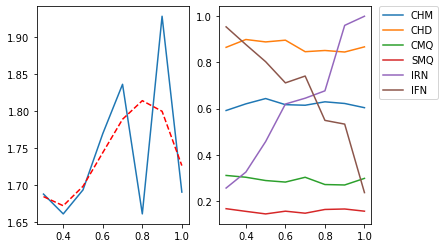

Max val resolution: 0.9



Metrics for Russel-JX__OUC-Family
Total classes: 276
Total controllers: 23
Open issues : 0
Stars : 2


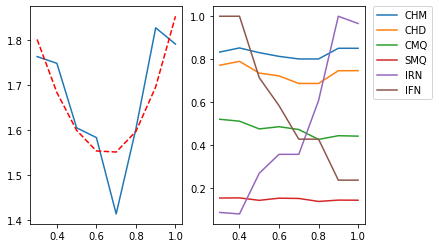

Max val resolution: 0.9



Metrics for GraffiTab__GraffiTab-Backend
Total classes: 188
Total controllers: 11
Open issues : 42
Stars : 5


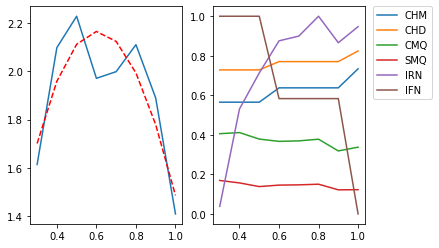

Max val resolution: 0.5



Metrics for muralibasani__kafkawize
Total classes: 99
Total controllers: 27
Open issues : 0
Stars : 70


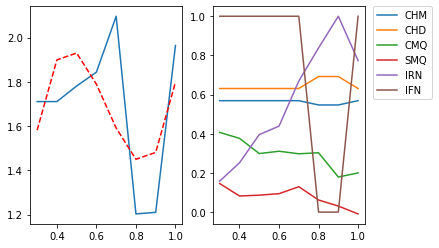

Max val resolution: 0.7



Metrics for ghostxbh__uzy-ssm-mall
Total classes: 89
Total controllers: 19
Open issues : 0
Stars : 19


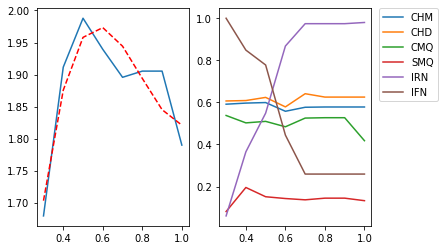

Max val resolution: 0.5



Metrics for yunchaoyun__active4j-oa
Total classes: 436
Total controllers: 78
Open issues : 1
Stars : 3


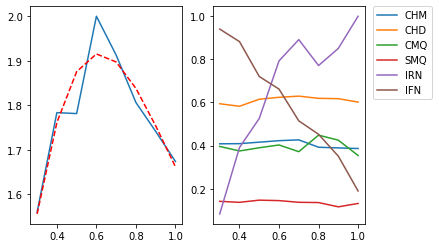

Max val resolution: 0.6



Metrics for peonycmsTeam__peonytancms
Total classes: 280
Total controllers: 29
Open issues : 0
Stars : 3


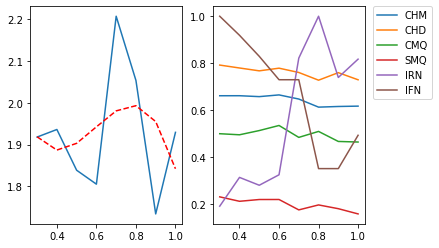

Max val resolution: 0.7



Metrics for softservedata__lv257
Total classes: 171
Total controllers: 18
Open issues : 2
Stars : 5


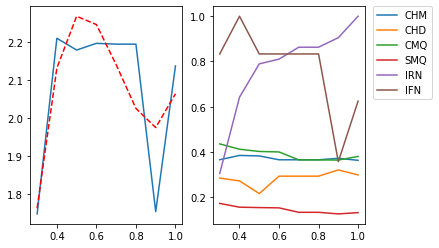

Max val resolution: 0.4



Metrics for tangdu__smh2
Total classes: 111
Total controllers: 25
Open issues : 0
Stars : 27


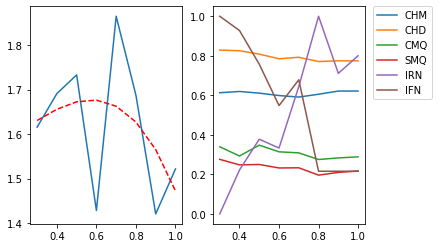

Max val resolution: 0.7



Metrics for RMHM__miniMap
Total classes: 83
Total controllers: 12
Open issues : 0
Stars : 3


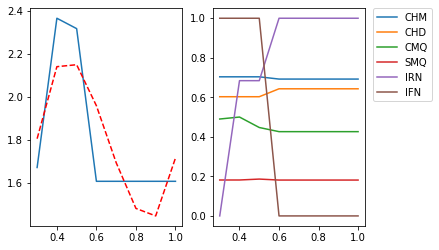

Max val resolution: 0.4



Metrics for smartcommunitylab__smartcampus.vas.corsi.web
Total classes: 65
Total controllers: 13
Open issues : 0
Stars : 3


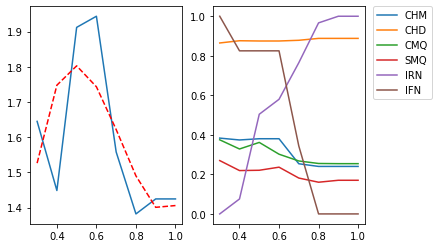

Max val resolution: 0.6



Metrics for Vino007__javaEEScaffold
Total classes: 45
Total controllers: 21
Open issues : 2
Stars : 84


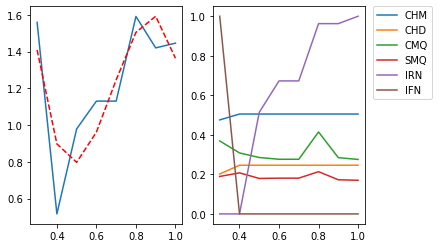

Max val resolution: 0.8



Metrics for GreaterLondonAuthority__GLA-OPS
Total classes: 625
Total controllers: 11
Open issues : 0
Stars : 2


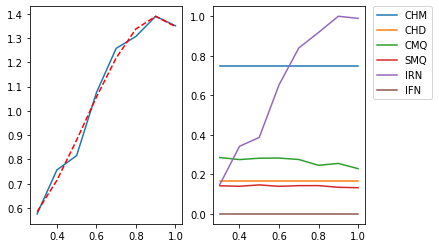

Max val resolution: 0.9



Metrics for Lewage59__design2019
Total classes: 33
Total controllers: 12
Open issues : 0
Stars : 2


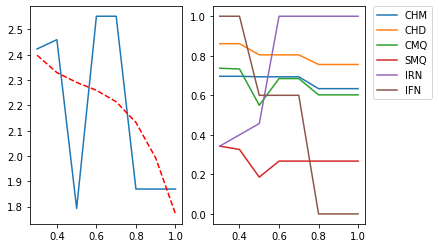

Max val resolution: 0.6



Metrics for holagoldfish__H5APP-java
Total classes: 39
Total controllers: 15
Open issues : 0
Stars : 3


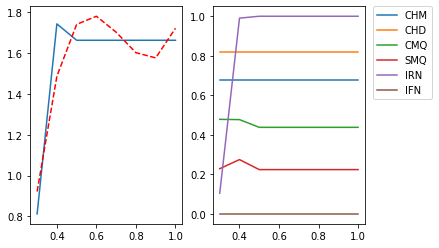

Max val resolution: 0.4



Metrics for tlkzzz__xpjfx
Total classes: 478
Total controllers: 120
Open issues : 0
Stars : 3


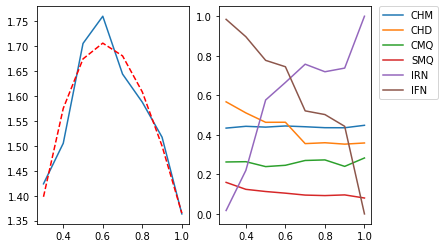

Max val resolution: 0.6



Metrics for kimki1124__MetelSOS
Total classes: 61
Total controllers: 11
Open issues : 0
Stars : 3


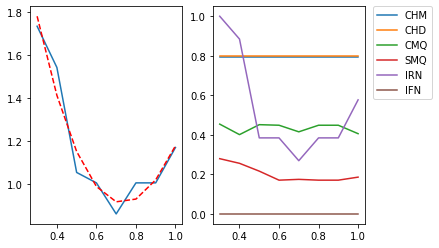

Max val resolution: 0.3



Metrics for zndo__oss-admin-parent
Total classes: 106
Total controllers: 32
Open issues : 0
Stars : 4


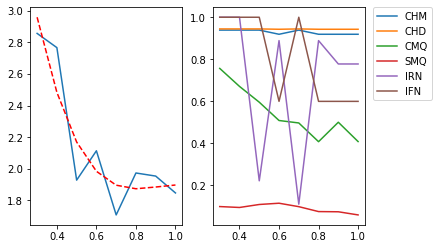

Max val resolution: 0.3



Metrics for okfarm09__JYLAND
Total classes: 68
Total controllers: 15
Open issues : 0
Stars : 3


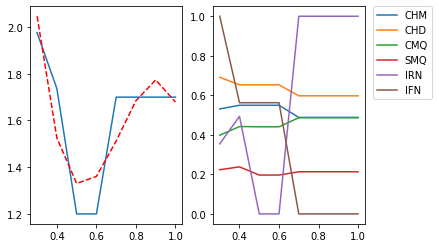

Max val resolution: 0.3



Metrics for Jeanwin__disrec
Total classes: 333
Total controllers: 53
Open issues : 0
Stars : 2


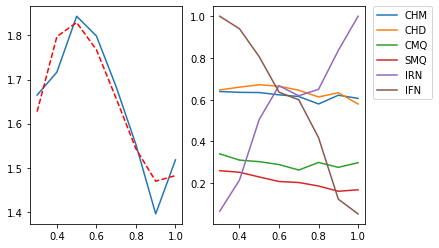

Max val resolution: 0.5



Metrics for OCR4all__OCR4all
Total classes: 47
Total controllers: 18
Open issues : 13
Stars : 86


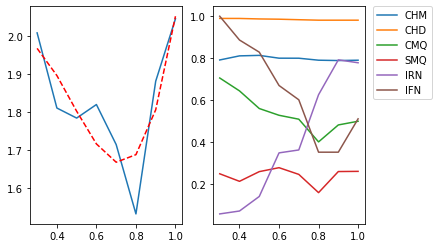

Max val resolution: 1.0



Metrics for choerodon__agile-service
Total classes: 815
Total controllers: 81
Open issues : 0
Stars : 3


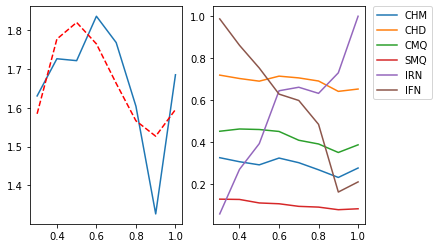

Max val resolution: 0.6



Metrics for gliderwiki__glider
Total classes: 329
Total controllers: 32
Open issues : 2
Stars : 15


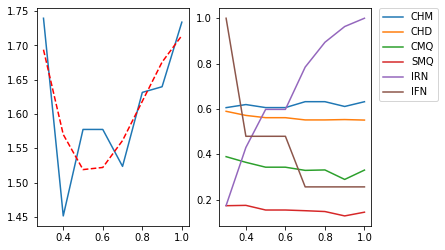

Max val resolution: 0.3



Metrics for HUTchengxi__Tutor
Total classes: 169
Total controllers: 17
Open issues : 0
Stars : 2


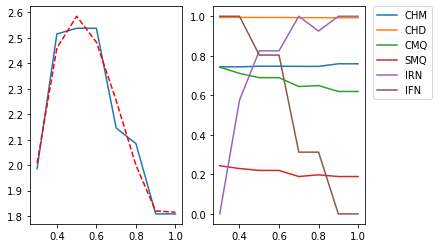

Max val resolution: 0.5



Metrics for litbo__hospitalzj
Total classes: 185
Total controllers: 26
Open issues : 0
Stars : 2


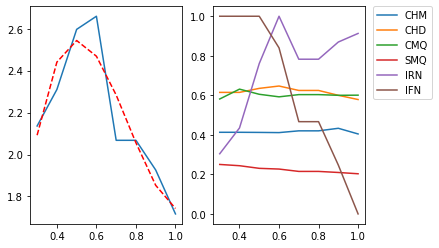

Max val resolution: 0.6



Metrics for Rocklee830630__WMSystem
Total classes: 816
Total controllers: 204
Open issues : 0
Stars : 4


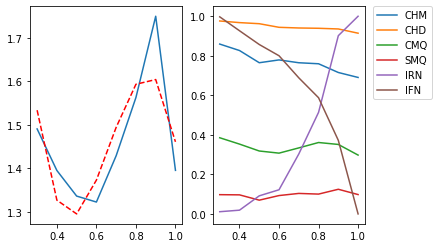

Max val resolution: 0.9



Metrics for superman544__JavaOJSystem
Total classes: 192
Total controllers: 20
Open issues : 2
Stars : 47


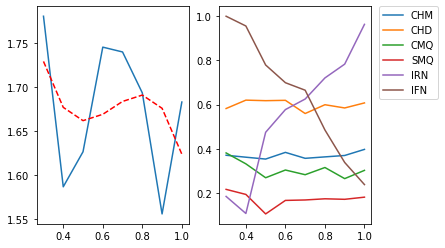

Max val resolution: 0.3



Metrics for huanglu20124__invoice
Total classes: 73
Total controllers: 12
Open issues : 2
Stars : 95


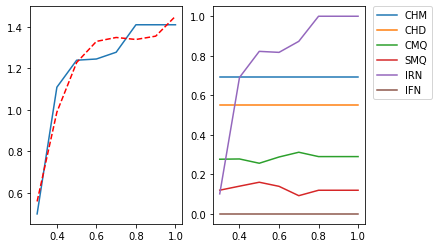

Max val resolution: 0.8



Metrics for yShen868__ssm03
Total classes: 94
Total controllers: 14
Open issues : 5
Stars : 4


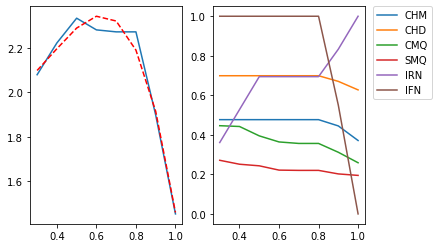

Max val resolution: 0.5



Metrics for zxwgdft__paladin-boot
Total classes: 328
Total controllers: 17
Open issues : 0
Stars : 6


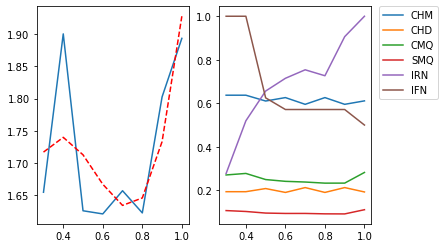

Max val resolution: 0.4



Metrics for 598605338__yikao
Total classes: 607
Total controllers: 37
Open issues : 0
Stars : 2


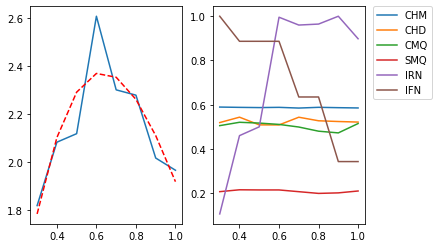

Max val resolution: 0.6



Metrics for zhaowei520__CDCXH
Total classes: 236
Total controllers: 33
Open issues : 1
Stars : 2


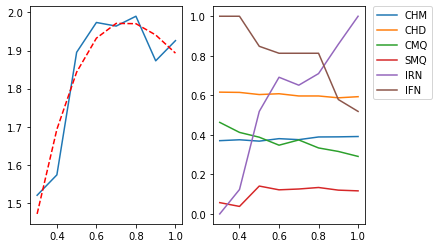

Max val resolution: 0.8



Metrics for JoeyBling__bootplus
Total classes: 150
Total controllers: 13
Open issues : 0
Stars : 58


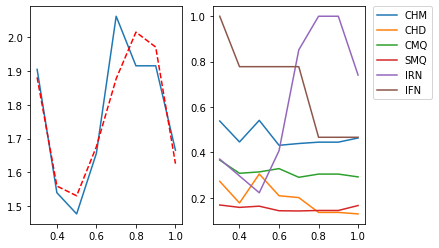

Max val resolution: 0.7



Metrics for wangwang1230__te-empl
Total classes: 156
Total controllers: 24
Open issues : 0
Stars : 4


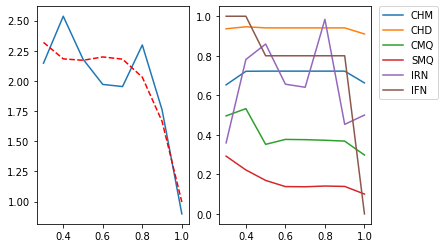

Max val resolution: 0.4



Metrics for bao17634__Warehouse-system
Total classes: 76
Total controllers: 13
Open issues : 1
Stars : 5


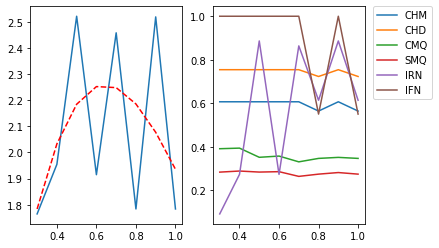

Max val resolution: 0.5



Metrics for hyperaeon__CrazyAndOptimize
Total classes: 1390
Total controllers: 26
Open issues : 2
Stars : 2


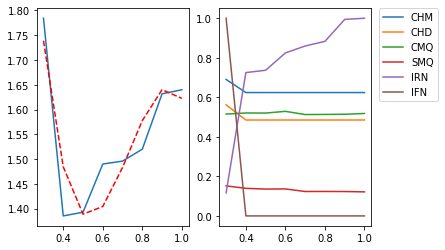

Max val resolution: 0.3



Metrics for doooyo__Weixin_Server
Total classes: 303
Total controllers: 32
Open issues : 0
Stars : 13


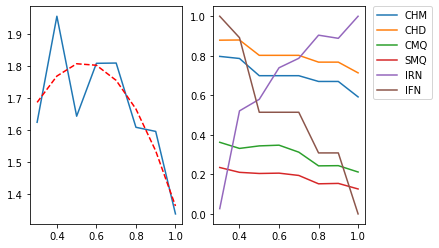

Max val resolution: 0.4



Metrics for 768330962__poet_ready_system
Total classes: 57
Total controllers: 14
Open issues : 3
Stars : 8


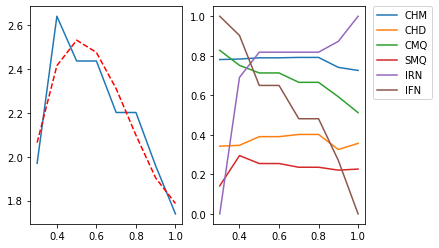

Max val resolution: 0.4



Metrics for HIIT__dime-server
Total classes: 91
Total controllers: 12
Open issues : 23
Stars : 13


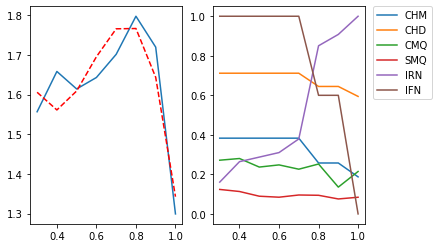

Max val resolution: 0.8



Metrics for mozammel__mNet
Total classes: 148
Total controllers: 21
Open issues : 3
Stars : 15


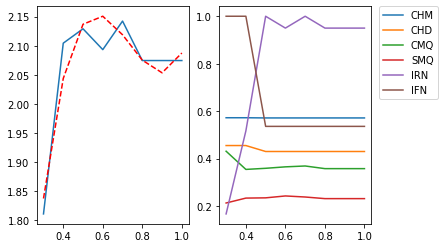

Max val resolution: 0.7



Metrics for heaptrip__heaptrip
Total classes: 483
Total controllers: 11
Open issues : 83
Stars : 2


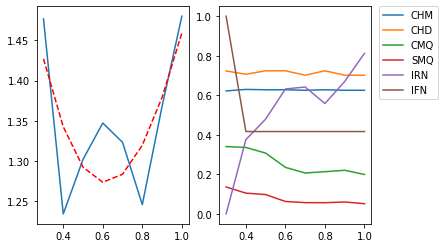

Max val resolution: 1.0



Metrics for moocss__EasyCMS
Total classes: 64
Total controllers: 12
Open issues : 0
Stars : 86


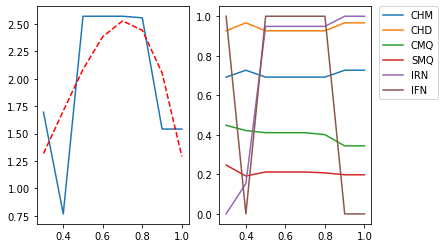

Max val resolution: 0.5



Metrics for next-step__jwp-jdbc
Total classes: 117
Total controllers: 16
Open issues : 1
Stars : 4


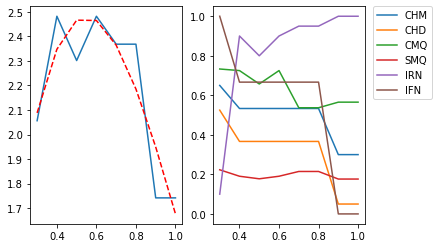

Max val resolution: 0.4



Metrics for EUSurvey__EUSURVEY
Total classes: 294
Total controllers: 46
Open issues : 11
Stars : 8


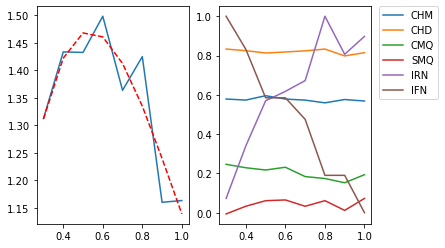

Max val resolution: 0.6



Metrics for wh4585hai__OnlineSchool
Total classes: 259
Total controllers: 26
Open issues : 0
Stars : 3


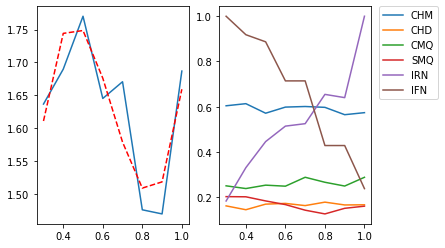

Max val resolution: 0.5



Metrics for AaronSum__hotel-mgr-sys
Total classes: 498
Total controllers: 31
Open issues : 0
Stars : 2


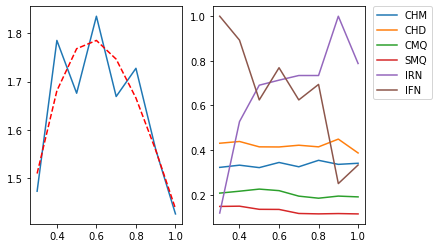

Max val resolution: 0.6



Metrics for gvSIGAssociation__gvsig-web
Total classes: 127
Total controllers: 51
Open issues : 0
Stars : 2


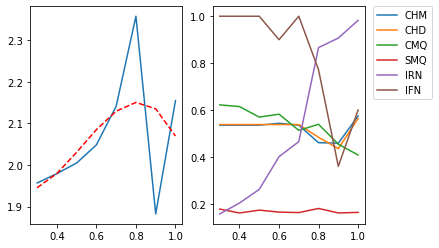

Max val resolution: 0.8



Metrics for pibigstar__parsevip
Total classes: 90
Total controllers: 17
Open issues : 0
Stars : 87


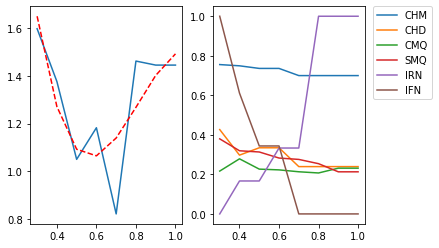

Max val resolution: 0.3



Metrics for immime__shop-2
Total classes: 292
Total controllers: 59
Open issues : 0
Stars : 2


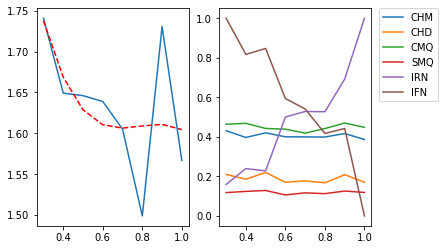

Max val resolution: 0.3



Metrics for tanzhb__zhgj-project
Total classes: 508
Total controllers: 75
Open issues : 1
Stars : 3


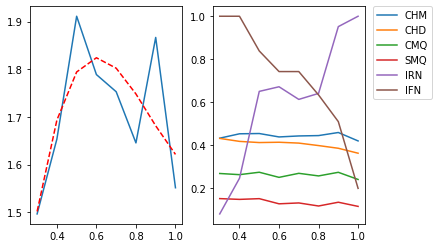

Max val resolution: 0.5



Metrics for qiao-zhi__jwxt
Total classes: 595
Total controllers: 76
Open issues : 2
Stars : 26


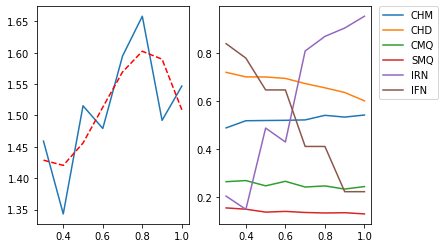

Max val resolution: 0.8



Metrics for jdmr__mateo
Total classes: 704
Total controllers: 149
Open issues : 3
Stars : 23


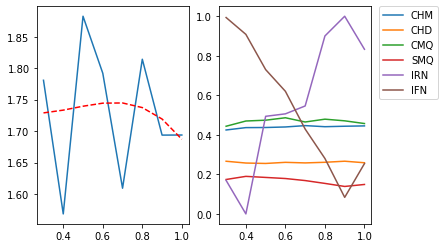

Max val resolution: 0.5



Metrics for opendevstack__ods-provisioning-app
Total classes: 146
Total controllers: 11
Open issues : 47
Stars : 11


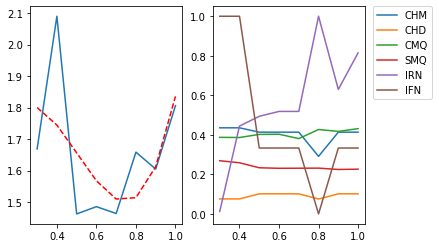

Max val resolution: 0.4



Metrics for TexnologiaLogismikou__Fiz
Total classes: 199
Total controllers: 18
Open issues : 3
Stars : 6


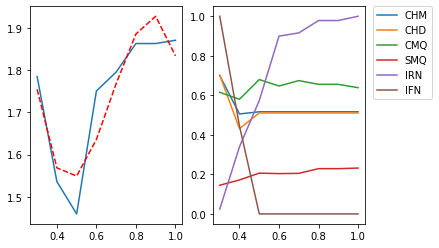

Max val resolution: 1.0



Metrics for amit-an__webapp_war_sample
Total classes: 334
Total controllers: 105
Open issues : 0
Stars : 2


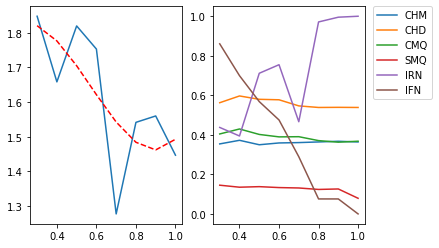

Max val resolution: 0.3



Metrics for kinorsi__mykided-api
Total classes: 710
Total controllers: 34
Open issues : 0
Stars : 2


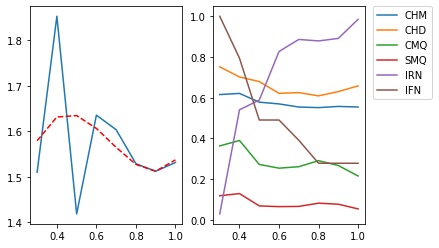

Max val resolution: 0.4



Metrics for superman7__AccountManagement
Total classes: 67
Total controllers: 15
Open issues : 0
Stars : 2


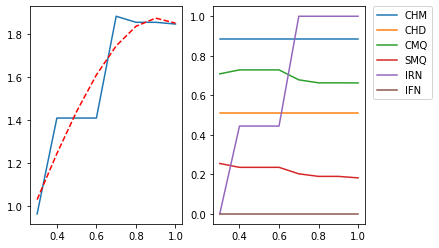

Max val resolution: 0.7



Metrics for Prasad108__TutesMessanger
Total classes: 109
Total controllers: 20
Open issues : 18
Stars : 8


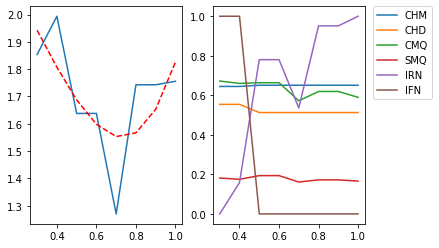

Max val resolution: 0.4



Metrics for tcrct__duang
Total classes: 377
Total controllers: 12
Open issues : 2
Stars : 4


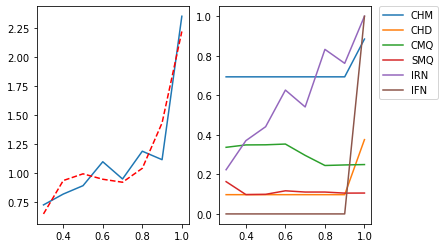

Max val resolution: 1.0



Metrics for easy-ware__api-manager
Total classes: 181
Total controllers: 90
Open issues : 5
Stars : 15


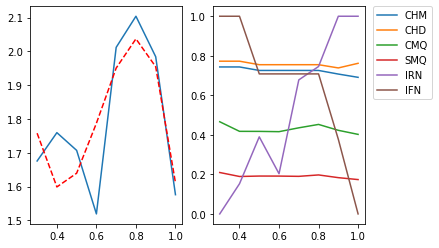

Max val resolution: 0.8



Metrics for simbest__simbest-cores
Total classes: 401
Total controllers: 28
Open issues : 0
Stars : 5


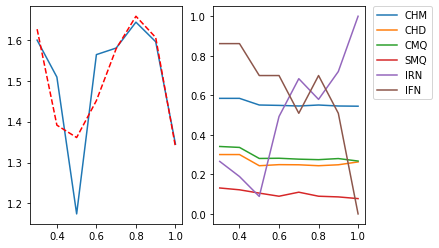

Max val resolution: 0.8



Metrics for Seenck__jeecg-bpm-3.8
Total classes: 810
Total controllers: 128
Open issues : 2
Stars : 5


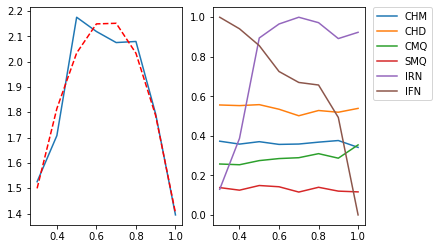

Max val resolution: 0.5



Metrics for UDA-EJIE__udaLib
Total classes: 320
Total controllers: 13
Open issues : 3
Stars : 7


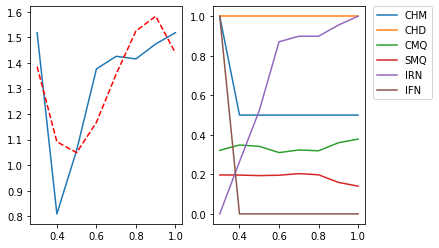

Max val resolution: 1.0



Metrics for yaowuya__lprapm
Total classes: 105
Total controllers: 26
Open issues : 1
Stars : 4


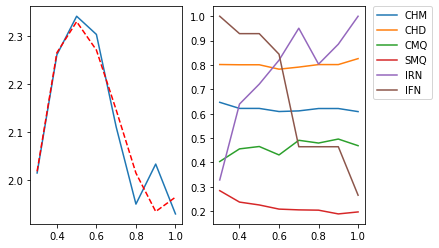

Max val resolution: 0.5



Metrics for nullcodeexecutor__pts
Total classes: 174
Total controllers: 27
Open issues : 0
Stars : 2


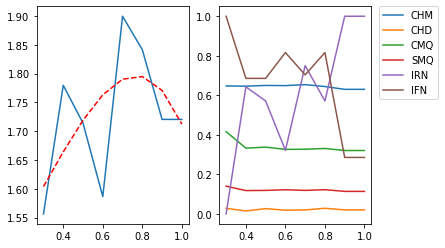

Max val resolution: 0.7



Metrics for jiangzongyao__kettle-master
Total classes: 70
Total controllers: 13
Open issues : 0
Stars : 24


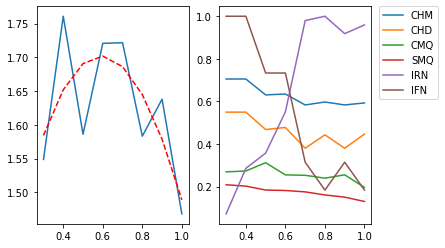

Max val resolution: 0.4



Metrics for khasang__delivery
Total classes: 218
Total controllers: 11
Open issues : 5
Stars : 6


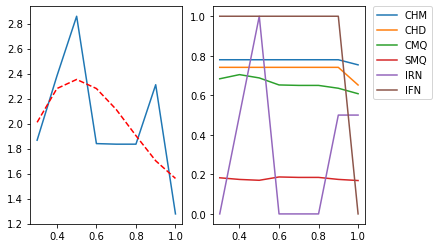

Max val resolution: 0.5



Metrics for suyeq__steamMall
Total classes: 120
Total controllers: 13
Open issues : 2
Stars : 8


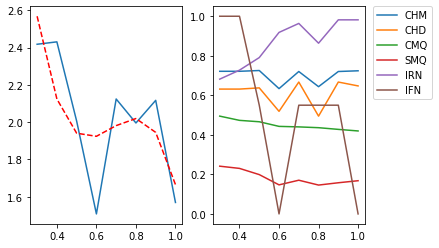

Max val resolution: 0.4



Metrics for fishstormX__fishmaple
Total classes: 173
Total controllers: 21
Open issues : 6
Stars : 11


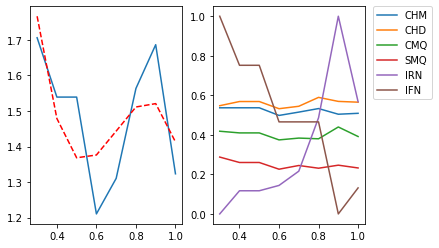

Max val resolution: 0.3



Metrics for lvr1997__ershoujiaoyi
Total classes: 78
Total controllers: 11
Open issues : 7
Stars : 14


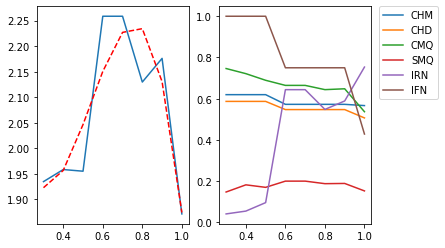

Max val resolution: 0.6



Metrics for vector1989__EMAS
Total classes: 265
Total controllers: 26
Open issues : 1
Stars : 9


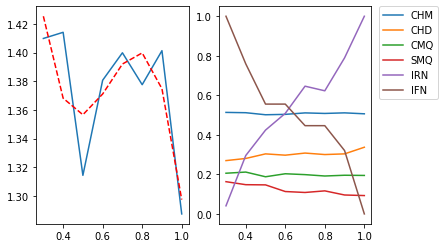

Max val resolution: 0.4



Metrics for dp2-g56__Dp2-L02
Total classes: 245
Total controllers: 40
Open issues : 0
Stars : 4


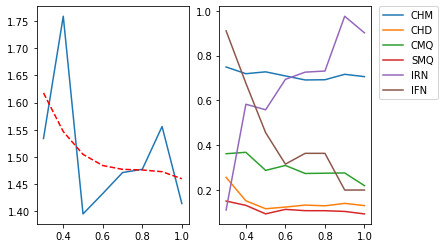

Max val resolution: 0.4



Metrics for ElectiveTeam__elective_system
Total classes: 97
Total controllers: 15
Open issues : 0
Stars : 4


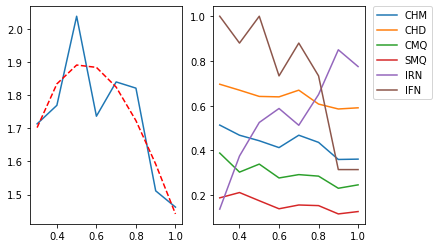

Max val resolution: 0.5



Metrics for qwe7783131__CareerDevelopment
Total classes: 193
Total controllers: 37
Open issues : 2
Stars : 2


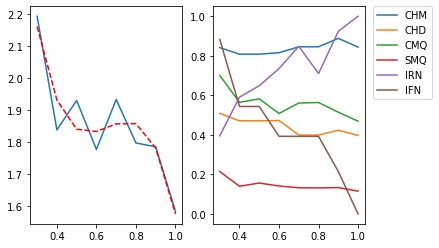

Max val resolution: 0.3



Metrics for fawks96__pet-hospital
Total classes: 74
Total controllers: 11
Open issues : 5
Stars : 2


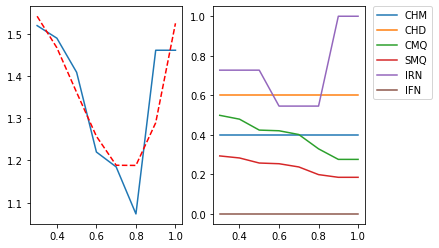

Max val resolution: 0.3



Metrics for qianqianjun__Educational-management
Total classes: 100
Total controllers: 20
Open issues : 3
Stars : 66


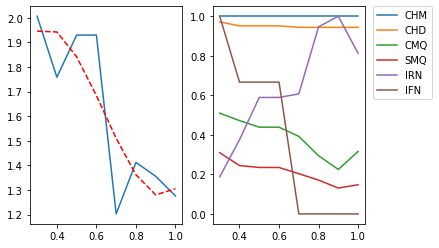

Max val resolution: 0.3



Metrics for Ryan--Yang__CBoard-boot
Total classes: 228
Total controllers: 15
Open issues : 2
Stars : 13


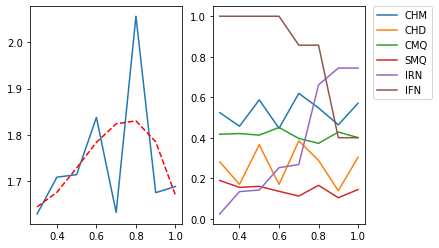

Max val resolution: 0.8



Metrics for MiniPa__cjs_ssms
Total classes: 98
Total controllers: 13
Open issues : 1
Stars : 11


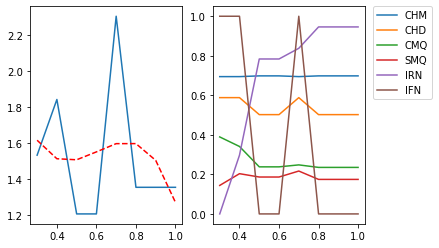

Max val resolution: 0.7



Metrics for flamefire33__uckefu
Total classes: 609
Total controllers: 75
Open issues : 0
Stars : 3


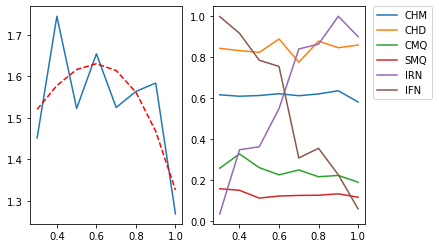

Max val resolution: 0.4



Metrics for moxiaohei__OPMS
Total classes: 130
Total controllers: 33
Open issues : 0
Stars : 3


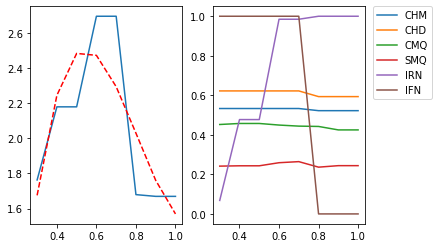

Max val resolution: 0.7



Metrics for Maxcj__Maxcj
Total classes: 177
Total controllers: 23
Open issues : 2
Stars : 2


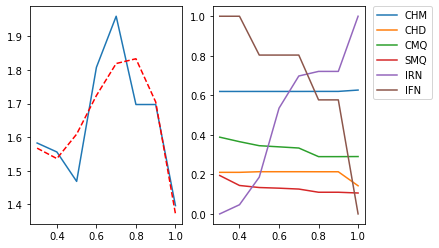

Max val resolution: 0.7



Metrics for RoyZeng__gmhx
Total classes: 402
Total controllers: 60
Open issues : 0
Stars : 2


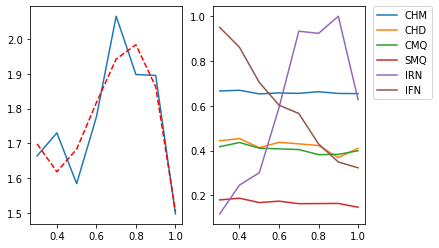

Max val resolution: 0.7



Metrics for jakarta99__iii-ee104
Total classes: 114
Total controllers: 36
Open issues : 0
Stars : 5


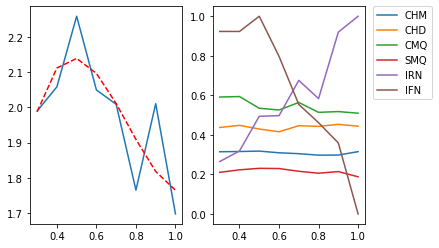

Max val resolution: 0.5



Metrics for nimble-platform__business-process-service
Total classes: 222
Total controllers: 47
Open issues : 16
Stars : 5


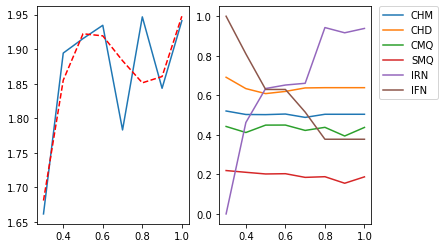

Max val resolution: 0.8



Metrics for SupermePower__zammc-manage
Total classes: 119
Total controllers: 18
Open issues : 0
Stars : 2


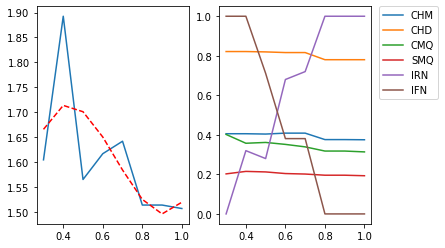

Max val resolution: 0.4



Metrics for jpetstore


ValueError: can only convert an array of size 1 to a Python scalar

In [22]:
import re


projects_data = pd.read_csv('merged_data.csv')

# Plot metrics
# Read all csv
total = 0
csvs = []
dir = '.'
for cur, directories, files in os.walk(dir):
    if cur == dir: # Current directory only
        for f in files:
            if 'csv' in f and 'merged_data' not in f:
                total += 1
                csvs.append(f)

executed_projects = set()
for f in csvs:
    try:
        project_name = re.split(r'_\d', f)[0]
        if project_name in executed_projects:
            continue
        executed_projects.add(project_name)
        project_data = projects_data[projects_data.name.eq(project_name.replace('__','/'))]
        print(f"\n\n\nMetrics for {project_name}")
        print(f"Total classes: {project_data.classes.item()}")
        print(f"Total controllers: {project_data.controllers.item()}")
        print(f"Open issues : {project_data.open_issues.item()}")
        print(f"Stars : {project_data.stars.item()}")
        

        df = read_csv(f)
        df = normalize_data(df)
        df = adjust_values(df)
        df = calculate_total(df)
        df = choose_best_iteration_for_resolution(df)
        plot(df)
        print(f"Max val resolution: {df.loc[df['TOTAL'].idxmax()].RESOLUTION}")
    except KeyError as e:
        print(f"KeyError on {project_name}")
        
# projects_data[projects_data.name.eq('AnonymousCyberWarrior/guoan_interface_1.0')]



In [11]:
# Boxplots (SOMETHING WRONG GOING ON HERE ON BOXPLOT, USE THE ONE AT THE END)
"""
frames = []
for f in csvs:
    try:
        project_name = re.split(r'_\d', f)[0]
        df = read_csv(f)
        #df = normalize_data(df)
        #df = adjust_values(df)
        df = calculate_total(df)
        df = choose_best_iteration_for_resolution(df)
        df_best = df.sort_values('TOTAL', ascending=False)[0:1]

        frames.append(df_best)
    except TypeError as e:
        print(f"[ERROR] Failed for project: {project_name}") # should only happen for other csvs in the folder other than metrics
        
df_concat = pd.concat(frames)
df_concat.sort_values('CHM', ascending=False)
df_concat.boxplot(column=['CHM', 'CHD', 'SMQ', 'CMQ'])

df_concat.sort_values('SMQ', ascending=True)
"""


'\nframes = []\nfor f in csvs:\n    try:\n        project_name = re.split(r\'_\\d\', f)[0]\n        df = read_csv(f)\n        #df = normalize_data(df)\n        #df = adjust_values(df)\n        df = calculate_total(df)\n        df = choose_best_iteration_for_resolution(df)\n        df_best = df.sort_values(\'TOTAL\', ascending=False)[0:1]\n\n        frames.append(df_best)\n    except TypeError as e:\n        print(f"[ERROR] Failed for project: {project_name}") # should only happen for other csvs in the folder other than metrics\n        \ndf_concat = pd.concat(frames)\ndf_concat.sort_values(\'CHM\', ascending=False)\ndf_concat.boxplot(column=[\'CHM\', \'CHD\', \'SMQ\', \'CMQ\'])\n\ndf_concat.sort_values(\'SMQ\', ascending=True)\n'

In [27]:
# Identify projects and histogram
projects = {re.split(r'_\d', p)[0] for p in set(next(os.walk('/home/mbrito/git/thesis/data/metrics_backup'))[2]) if 'csv' in p and 'merged' not in p}
projects_data = pd.read_csv('merged_data.csv')

print(len(csvs))                
for f in csvs:
    try:
        project_name = re.split(r'_\d', f)[0]
    except TypeError as e:
        print(f"[ERROR] Failed for project: {project_name}") # should only happen for other csvs in the folder other than metrics

projects = {p.replace('__', '/') for p in projects}
final_projects = set()
drop_indexes = []

# Identify and remove the projects that did not get executed due to parser complications (projects that did not compile or had other issues)
for index, row in projects_data.iterrows():
    if row['name'] not in projects:        
        drop_indexes.append(index)
    else:
        final_projects.add(row['name'])

    

# Filter out the top 10% outliers
projects_data = projects_data.drop(projects_data.index[drop_indexes]).reset_index(drop=True)
#q = projects_data["classes"].quantile(0.9)
projects_hist = projects_data.loc[(projects_data.classes < q)]


205


[ 30 105 180 255 330 405 480 555 630 705 780]
30 105
105 180
180 255
255 330
330 405
405 480
480 555
555 630
630 705
705 780


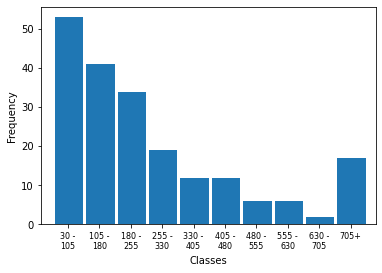

181

In [163]:
# USE THIS ONE AS HISTOGRAM
ran = np.arange(30,800,75)
#ran = np.append(ran, [2600])
print(ran)
#plt.hist(projects_data['classes'], bins=ran, align='left',rwidth=0.8, color='steelblue')
_, bins, patches = plt.hist(np.clip(projects_data['classes'], ran[0], ran[-1]), bins=ran, rwidth=0.9)

labels = []
it = iter(list(ran))
min = next(it)
for max in it:
    print(f"{min} {max}")    
    labels.append(f"{min} -\n{max}")
    min = max

    


xlabels = bins[1:].astype(str)
xlabels[-1] += '+'

labels = labels[:-1]
labels.append('705+')

rans_2 = [r + 35 for r in ran]
plt.xticks(rans_2, labels, fontsize=8)
plt.ylabel('Frequency')
plt.xlabel('Classes', labelpad=5)
plt.xlim([0, 800])


plt.savefig('new_histogram.png')
plt.show()

len(projects_hist)

Class range 0 - 150 - 80 applications


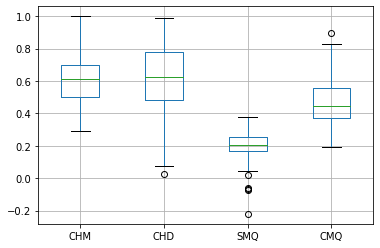

Class range 150 - 300 - 60 applications


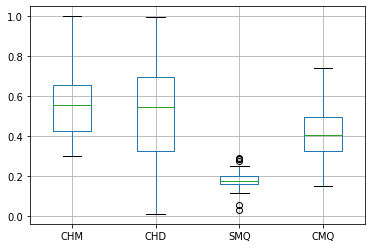

Class range 300 - 450 - 22 applications


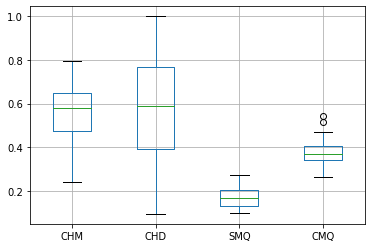

Class range 450 - 600 - 17 applications


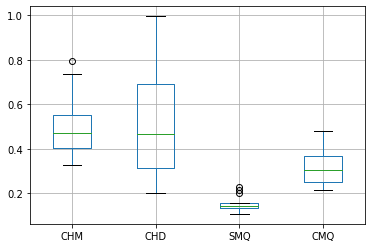

Class range 600 - 750 - 8 applications


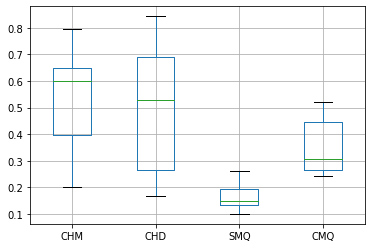

Class range 750 - 900 - 6 applications


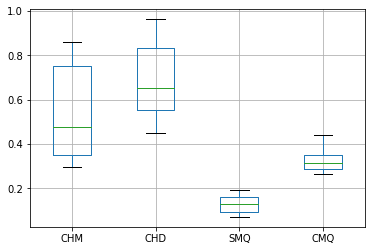

Class range 900 - 1000 - 3 applications


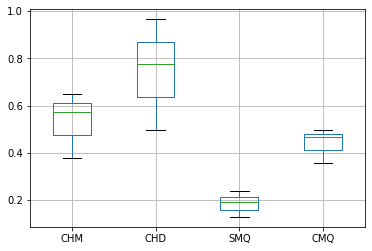

Class range 1000 - 10000 - 6 applications


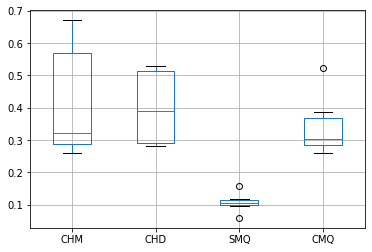

Overall boxplot


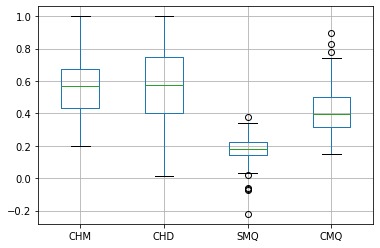

In [14]:
metrics = {re.split(r'_\d', p)[0] : p for p in set(next(os.walk('/home/mbrito/git/thesis/data/metrics'))[2]) if 'csv' in p and 'merged' not in p}
def copy_items(df_dst, index, df_src, labels):
    for l in labels:
        df_dst.loc[index, l] = df_src[l].item()
        
for index, row in projects_data.iterrows():
    name = row['name'].replace('/', '__')
    if name in metrics:
        df = read_csv(f"/home/mbrito/git/thesis/data/metrics/{metrics[name]}")
        df_temp = df.copy()
        df_temp = normalize_data(df_temp)
        df_temp = adjust_values(df_temp)
        
        df_temp = calculate_total(df_temp)
        df_temp = choose_best_iteration_for_resolution(df_temp)
        
        df_best = df_temp.sort_values('TOTAL', ascending=False)[0:1]
        copy_items(projects_data, index, df.iloc[df_best.index.item()], ['RESOLUTION', 'CHM', 'CHD', 'IRN', 'IFN', 'OPN', 'CMQ', 'SMQ', 'SERVICES'])
        
# projects_data merged with metrics 
def get_df_in_range(min, max):
    return projects_data[(projects_data['classes'] > min) & (projects_data['classes'] <= max)].sort_values('classes', ascending=False)

# Create the actual groups
ran = np.arange(0,1001, 150)
ran = np.append(ran, [1000,10000])

it = iter(list(ran))
mi = next(it)
df_groups = []
for ma in it:
    #print(f"{mi} {ma}")
    df_group = get_df_in_range(mi, ma)
    df_groups.append(([mi,ma], df_group))
    mi = ma


    

for ran, df in df_groups:
    print(f"Class range {ran[0]} - {ran[1]} - {len(df)} applications")
    df.boxplot(column=['CHM', 'CHD', 'SMQ', 'CMQ'])
    plt.show()
    
projects_data.sort_values('SMQ')

print(f"Overall boxplot")
projects_data.boxplot(column=['CHM', 'CHD', 'SMQ', 'CMQ'])
plt.savefig('boxplot.png')



In [15]:
projects_data[pd.isnull(projects_data).any(axis=1)]

Empty DataFrame
Columns: [name, classes, controllers, size, stars, forks, language, subscribers, open_issues, user, repo, RESOLUTION, CHM, CHD, IRN, IFN, OPN, CMQ, SMQ, SERVICES]
Index: []

In [16]:
len(projects_data[0:200])

200

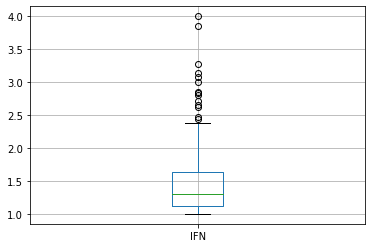

In [17]:
projects_data.boxplot(column=['IFN'])
plt.savefig('boxplot_ifn.png')
